# The CBS algorithm for MAPF

In [4]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../')
from metrics import flowtime, makespan
                
from MAPF import MultiAgentAStar,find_conflict,CBS
%load_ext autoreload
%autoreload 2

%matplotlib inline

CBS Flowtime == MAAS Flowtime? True
8 [[6, 3, 4, 5], [4, 7], [3, 6], [0, 0, 1, 4]] 8 [[6 3 4 5]
 [4 7 7 7]
 [3 6 6 6]
 [0 0 1 4]]
(6, 4, 3, 0) (5, 7, 6, 4)


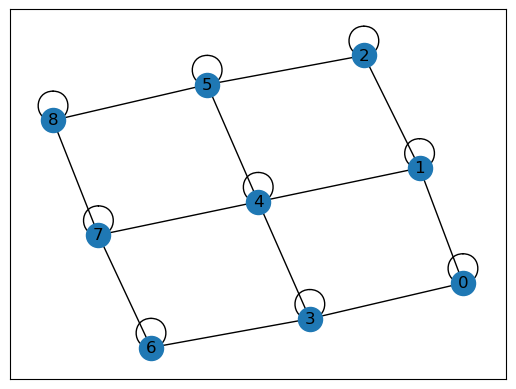

In [32]:
from time import time

n_nodes = 9

ldim = int(np.ceil(np.sqrt(n_nodes)))
udim = int(np.floor(np.sqrt(n_nodes)))
G = nx.grid_graph([ldim,udim])
G = nx.convert_node_labels_to_integers(G)

for i in range(len(G)):
    G.add_edge(i,i)
    
n_nodes = G.number_of_nodes()

n_agents = 4

start_nodes = (6, 4, 3, 0)  # Must be hashable.

goal_nodes = (5, 7, 6, 4) 

labeled_goals = True 

t = time()
result = MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)
if result:
    MAAS_sol,MAAS_ft = result

MAAS_time = time()-t

t = time()
result = CBS(G,start_nodes,goal_nodes)
if result:
    CBS_sol,CBS_ft = result

CBS_time = time()-t

print('CBS Flowtime == MAAS Flowtime?',CBS_ft == MAAS_ft)

print(CBS_ft,CBS_sol,MAAS_ft,MAAS_sol)
print(start_nodes,goal_nodes)

nx.draw_networkx(G)
plt.show()

